# HR - Attrition Analytics

In [1]:
#Human Resources are critical resources of any organiazation. Organizations spend huge amount 
#of time and money to hire and nuture their employees. It is a huge loss for companies if employees 
#leave, especially the key resources. So if HR can predict weather employees are at risk for leaving 
#the company, it will allow them to identify the attrition risks and help understand and provie necessary 
#support to retain those employees or do preventive hiring to minimize the impact to the orgranization.

# Why are our best and most experienced employees leaving prematurely?

In [2]:
#Fields in the dataset include:

#Employee satisfaction level
#Last evaluation
#Number of projects
#Average monthly hours
#Time spent at the company
#Whether they have had a work accident
#Whether they have had a promotion in the last 5 years
#Department
#Salary
#Whether the employee has left

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#columns=['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','work_accident','left','promotion','department','salary']

In [2]:
#hr_df = pd.read_csv( 'HR_Perf.csv',header=None,names=columns)
hr_df=pd.read_csv('HR_Perf.csv')

Let's look at few records

In [3]:
hr_df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
hr_df.rename(columns={'sales':'dept'},inplace=True)

Basic Information about column, types and if any missing data

In [5]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
dept                     14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
for col in hr_df.columns:
    if hr_df[col].dtype=='object':
        hr_df[col]=pd.Categorical(hr_df[col]).codes

In [7]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
dept                     14999 non-null int8
salary                   14999 non-null int8
dtypes: float64(2), int64(6), int8(2)
memory usage: 966.8 KB


Are there any null or missing values in the dataset?

In [8]:
hr_df.isnull().any().sum()

0

In [9]:
hr_df.shape

(14999, 10)

In [10]:
hr_df['dept'].value_counts()

7    4140
9    2720
8    2229
0    1227
6     902
5     858
1     787
2     767
3     739
4     630
Name: dept, dtype: int64

In [11]:
hr_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0
dept,14999.0,5.870525,2.868786,0.00,4.00,7.00,8.00,9.0
salary,14999.0,1.347290,0.625819,0.00,1.00,1.00,2.00,2.0


No Missing Data. This seems to be a good dataset. 

In [12]:
hr_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

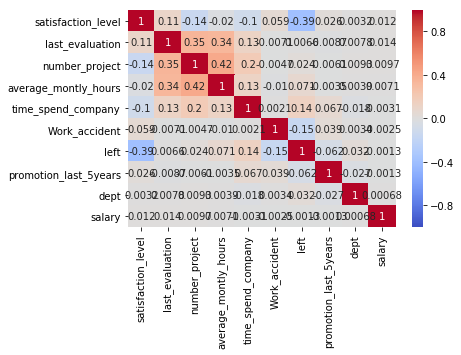

In [13]:
#import seaborn as sns
#plt.figure(figsize=(10,15))
sns.heatmap(hr_df.corr(),vmin=-1,cmap='coolwarm',annot=True)

Lets check corrleation between Variables

In [14]:
hr_df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.003153,0.011754
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.007772,0.013965
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.009268,0.009672
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.003913,0.007082
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.018010,-0.003086
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.003425,-0.002506
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.032105,-0.001294
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.027336,-0.001318
dept,0.003153,0.007772,0.009268,0.003913,-0.018010,0.003425,0.032105,-0.027336,1.000000,0.000685
salary,0.011754,0.013965,0.009672,0.007082,-0.003086,-0.002506,-0.001294,-0.001318,0.000685,1.000000


In [15]:
hr_df.corr()['left']

satisfaction_level      -0.388375
last_evaluation          0.006567
number_project           0.023787
average_montly_hours     0.071287
time_spend_company       0.144822
Work_accident           -0.154622
left                     1.000000
promotion_last_5years   -0.061788
dept                     0.032105
salary                  -0.001294
Name: left, dtype: float64

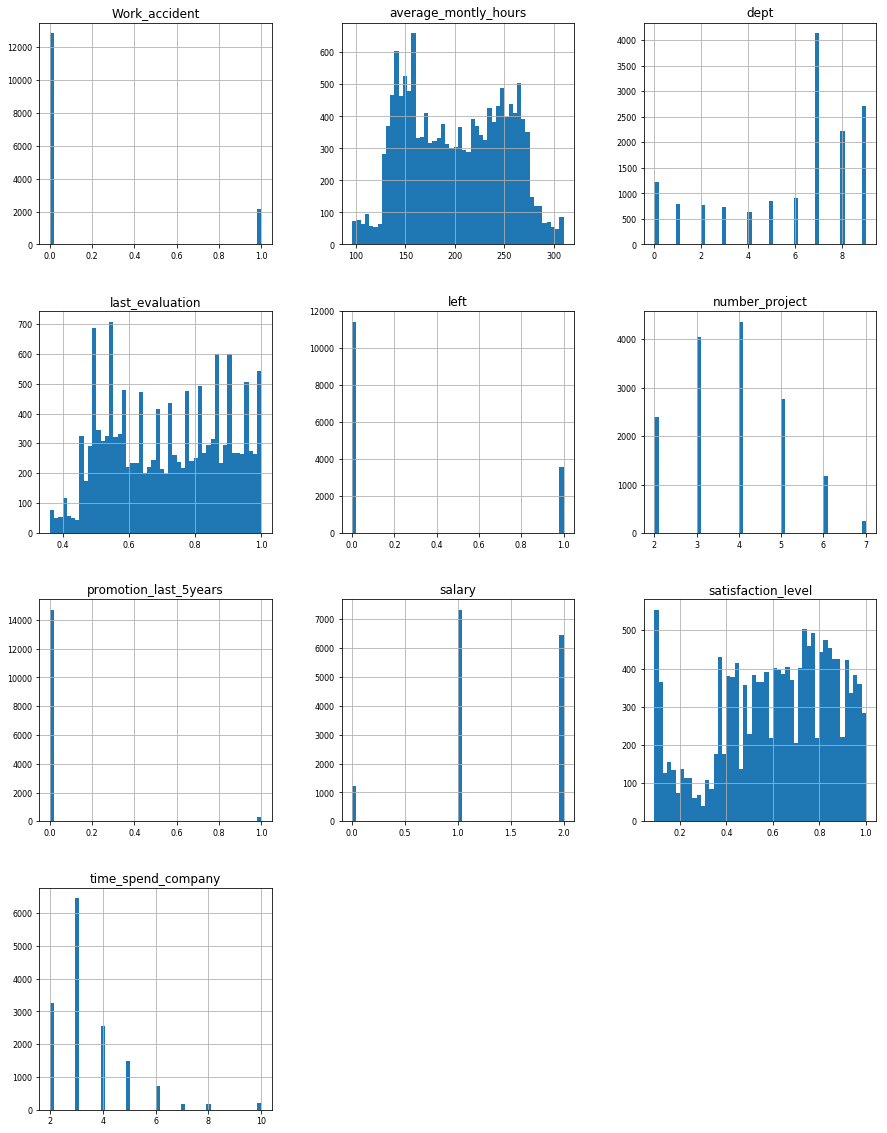

In [22]:
hr_df.hist(figsize=(15,20),bins = 50,xlabelsize=8,ylabelsize =8)
plt.show()

# Question1: Predict Attrition using the follwing models
1. Logistic Regression
2. Decision Trees
3. Bagging
4. AdaBoost
5. RandomForest

# Question2: Improve the accuracy by optimizing hyperparameters of the models

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [17]:
y=hr_df['left']
x=hr_df.drop('left',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=5)

# Logistic Regression

In [18]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7710018668326073

In [19]:
from sklearn.metrics import accuracy_score
lr_y_predict=lr.predict(x_test)
accuracy_score(y_test,lr_y_predict)

0.7528

In [20]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, lr_y_predict),
    columns=['Predicted Left', 'Predicted Not Left'],
    index=['True Left', 'True Not left']
)

,Predicted Left,Predicted Not Left
True Left,2599,232
True Not left,695,224


# Decision Tree Classier

In [24]:
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)

1.0

In [27]:
y_predict=dt.predict(x_test)

In [28]:
dt.score(x_test,y_test)

0.9805333333333334

In [29]:
accuracy_score(y_test,y_predict)

0.9805333333333334

In [30]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Left', 'Predicted Not Left'],
    index=['True Left', 'True Not left']
)


,Predicted Left,Predicted Not Left
True Left,2785,46
True Not left,27,892


# Bagging Classifier

In [31]:
bgc=BaggingClassifier(n_estimators=50)
bgc.fit(x_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=50, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [32]:
bgc_y_predict=bgc.predict(x_test)
accuracy_score(y_test,bgc_y_predict)

0.9914666666666667

In [33]:
#from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, bgc_y_predict),
    columns=['Predicted Left', 'Predicted Not Left'],
    index=['True Left', 'True Not left']
)

,Predicted Left,Predicted Not Left
True Left,2822,9
True Not left,23,896


# Random Forest Classifier

In [42]:
rm=RandomForestClassifier(n_estimators=50)
rm.fit(x_train,y_train)
rm.score(x_train,y_train)

0.9998222064183483

In [43]:
rm_y_predict=rm.predict(x_test)

In [44]:
accuracy_score(y_test,rm_y_predict)

0.9933333333333333

In [45]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, rm_y_predict),
    columns=['Predicted Left', 'Predicted Not Left'],
    index=['True Left', 'True Not left']
)

,Predicted Left,Predicted Not Left
True Left,2827,4
True Not left,21,898


# AdaBoostClassifier

In [39]:
ada=AdaBoostClassifier(base_estimator=dt,n_estimators=50)

In [40]:
ada.fit(x_train,y_train)
ada_y_predict=ada.predict(x_test)
accuracy_score(y_test,ada_y_predict)

0.9816

In [41]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, ada_y_predict),
    columns=['Predicted Left', 'Predicted Not Left'],
    index=['True Left', 'True Not left']
)

,Predicted Left,Predicted Not Left
True Left,2788,43
True Not left,26,893


# GB Classifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier(n_estimators=50)
gbc.fit(x_train,y_train)
gbc_y_predict=gbc.predict(x_test)
accuracy_score(y_test,gbc_y_predict)

0.9757333333333333

In [ ]:
# Random Forest Model gives better accuracy.So using this model to identify which feature is major reason for Attrition
# As per Bar chart, feature satisfaction level is the first major reason for Attrition

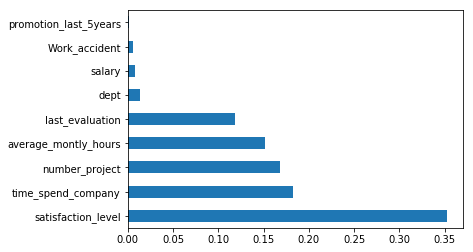

In [50]:
feat_importances = pd.Series(rm.feature_importances_, index=x.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')

# List all model accuracy score and displaying visual representation of accuracy scores

In [54]:
data = {'Algorithm':['Logistic','Decision Tree','Bagging', 'RM', 'Ada','GB'], 
        'Accuracy':[0.75,.98,.9914,.993,.982,.976], 
        } 

dummy_df=pd.DataFrame(data)

In [55]:
dummy_df.head()

,Algorithm,Accuracy
0,Logistic,0.7500
1,Decision Tree,0.9800
2,Bagging,0.9914
3,RM,0.9930
4,Ada,0.9820


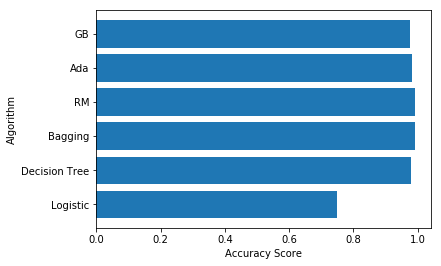

In [68]:
index=np.arange(len(dummy_df['Algorithm']))
plt.barh(index,dummy_df['Accuracy'],align='center')
plt.yticks(index,dummy_df['Algorithm'])
plt.xlabel('Accuracy Score')
plt.ylabel('Algorithm')
plt.show()